In [287]:
import pandas as pd 
import numpy as np 
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [288]:
data = load_breast_cancer()

In [289]:
print("\n---------  Data Sample  ----------")
print(data.data)
print("\n---------  Data Shape  ----------")
print(data.data.shape)
print("\n---------  Data Type  ----------")
print(type(data.data))
print("\n---------  Features  ----------")
print(data.feature_names)
print("\n---------  Targets Names  ----------")
print(data.target_names)
print("\n---------  Targets Sample ----------")
print(data.target[:100])
print("\n---------  Targets Shape ----------")
print(data.target.shape)



---------  Data Sample  ----------
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]

---------  Data Shape  ----------
(569, 30)

---------  Data Type  ----------
<class 'numpy.ndarray'>

---------  Features  ----------
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'wor

### Train and Test Split

In [290]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.20)
N, D = X_train.shape

In [291]:
print(N)
print(D)

455
30


In [292]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Building

In [293]:
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [294]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [295]:
# Let's Convert the data into torch tensors 

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
# add an extra dimension for y_train and test
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

## Model Training

In [296]:
# Number of epochs 
EPOCHS = 1000

# Arrays for storing losses 
train_loss = []
test_loss = []
train_acc = []
test_acc = [] 

for i in range(EPOCHS) : 
    optimizer.zero_grad()

    # forward pass 
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    # Get Training Accuracy per epoch
    with torch.no_grad() :
        pred = np.round(outputs.numpy())
        train_accuracy = np.mean(pred == y_train.numpy())
        train_acc.append(train_accuracy)

    # Backpropagation 
    loss.backward()
    optimizer.step()
    
    # Get test loss 
    outputs_test = model(X_test)
    loss_test = criterion(outputs_test, y_test)
    # Get Testing Accuracy per epoch
    with torch.no_grad() :
        pred = np.round(outputs_test.numpy())
        test_accuracy = np.mean(pred == y_test.numpy())
        test_acc.append(test_accuracy)

    # Save loss and acc per iteration 
    train_loss.append(loss.item())
    test_loss.append(loss_test.item())

    if (i+1) % 50 == 0:
        print(f"Epoch {i+1}: Train Loss: {loss.item():.4f},\tTest Loss: {loss_test.item():.4f}, Train Acc: {train_accuracy:.4f}, Test Acc: {test_accuracy:.4f}")

Epoch 50: Train Loss: 0.6257,	Test Loss: 0.6047, Train Acc: 0.7253, Test Acc: 0.7368
Epoch 100: Train Loss: 0.4487,	Test Loss: 0.4250, Train Acc: 0.8879, Test Acc: 0.9123
Epoch 150: Train Loss: 0.3540,	Test Loss: 0.3353, Train Acc: 0.9275, Test Acc: 0.9298
Epoch 200: Train Loss: 0.2953,	Test Loss: 0.2819, Train Acc: 0.9407, Test Acc: 0.9298
Epoch 250: Train Loss: 0.2553,	Test Loss: 0.2464, Train Acc: 0.9516, Test Acc: 0.9386
Epoch 300: Train Loss: 0.2262,	Test Loss: 0.2209, Train Acc: 0.9560, Test Acc: 0.9474
Epoch 350: Train Loss: 0.2040,	Test Loss: 0.2017, Train Acc: 0.9626, Test Acc: 0.9474
Epoch 400: Train Loss: 0.1866,	Test Loss: 0.1867, Train Acc: 0.9692, Test Acc: 0.9474
Epoch 450: Train Loss: 0.1726,	Test Loss: 0.1747, Train Acc: 0.9736, Test Acc: 0.9474
Epoch 500: Train Loss: 0.1610,	Test Loss: 0.1649, Train Acc: 0.9736, Test Acc: 0.9474
Epoch 550: Train Loss: 0.1513,	Test Loss: 0.1568, Train Acc: 0.9758, Test Acc: 0.9474
Epoch 600: Train Loss: 0.1431,	Test Loss: 0.1499, Train

### Plot the Loss

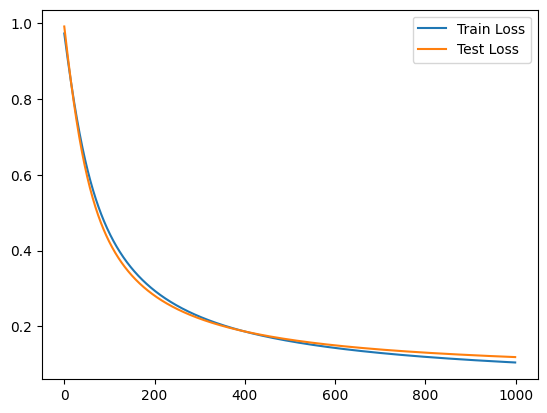

In [297]:
plt.plot(train_loss, label="Train Loss")
plt.plot(test_loss, label="Test Loss")
plt.legend()
plt.show()

### Plot The Accuracy

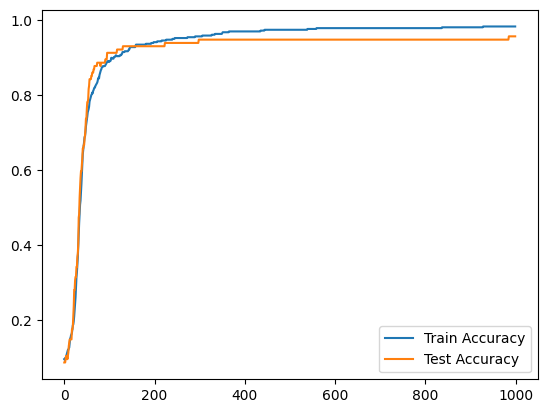

In [298]:
plt.plot(train_acc, label="Train Accuracy")
plt.plot(test_acc, label="Test Accuracy")
plt.legend()
plt.show()

### Save and Load the model

In [300]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1639, -0.3304, -0.2881, -0.1985, -0.3129, -0.3742, -0.1811, -0.3031,
                       -0.2616,  0.7036, -0.3928,  0.1736, -0.2101, -0.4529,  0.1194, -0.0299,
                       -0.0684, -0.2170,  0.2503,  0.4048, -0.1762, -0.4392, -0.4911, -0.4860,
                       -0.4494, -0.2375, -0.1341, -0.2297, -0.2791, -0.2291]])),
             ('0.bias', tensor([0.4012]))])

In [301]:
# Save the model
torch.save(model.state_dict(), "mymodel.pt")

In [302]:
loaded_model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

loaded_model.load_state_dict(torch.load('mymodel.pt'))

<All keys matched successfully>